In [1]:
#The considered dataset (Wine Quality dataset) contains information on different types of wines, their properties, 
#and the quality of each wine. https://www.kaggle.com/rajyellow46/wine-quality  
#Here are the details:

#Instances (rows): 6497
#Attributes (columns) 13 : 11 numeric and 2 categorical

#Numerical Variables:

#1.fixed acidity: the amount of tartaric acid in wine measured in g/dm3
#2.volatile acidity: the amount of acetic acid in wine measured in g/dm3
#3.citric acid: the amount of citric acid in wine measured in g/dm3
#4.residual sugar: the amount of sugar remaining after fermentation measured in g/dm3
#5.chlorides: the amount of salt in wine measured in g/dm3
#6.free sulfur dioxide: the amount of SO2 that is not bound to other molecules in wine measured in mg/dm3
#7.total sulfur dioxide: the amount of SO2 that is bound to other molecules in wine measured in mg/dm3
#8.density: the density of wine measured in g/cm3
#9.pH: the pH value of wine on a scale from 0 to 14
#10.sulphates: the amount of sulphates in wine measured in g/dm3
#11.alcohol: the percentage of alcohol content in wine

#Categorical Variables:

#1.type: two classes of wine, either red or white
#2.quality: the score of wine on a scale from 0 to 10, with 0 being the worst and 10 being the best

#The aim of this dataset is to predict the quality of wine based on its various attributes.

In [2]:
#Import librairies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV


In [3]:
# Load the dataset into a Pandas dataframe
df=pd.read_csv('D:\StockageDrive\CV\GoMyCode Cours IA1\Projet\winequalityN.csv', encoding="ISO-8859-1")
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(df.info())
#The print(df.info()) code is used to display a summary of a pandas dataframe df, which includes information such as:
#The number of rows and columns in the dataframe
#The column names
#The number of non-null values in each column
#The data type of each column
#The memory usage of the dataframe
#This information can be helpful in understanding the structure and contents of a dataframe, 
#and can be particularly useful when dealing with large datasets. 
#The .info() method is a convenient way to get a quick overview of the data without having to manually inspect each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [5]:
# Generate a statistical summary of the attributes
summary = df.describe(include='all')

# Print the summary
print(summary)

         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497    6487.000000       6489.000000  6494.000000     6495.000000   
unique      2            NaN               NaN          NaN             NaN   
top     white            NaN               NaN          NaN             NaN   
freq     4898            NaN               NaN          NaN             NaN   
mean      NaN       7.216579          0.339691     0.318722        5.444326   
std       NaN       1.296750          0.164649     0.145265        4.758125   
min       NaN       3.800000          0.080000     0.000000        0.600000   
25%       NaN       6.400000          0.230000     0.250000        1.800000   
50%       NaN       7.000000          0.290000     0.310000        3.000000   
75%       NaN       7.700000          0.400000     0.390000        8.100000   
max       NaN      15.900000          1.580000     1.660000       65.800000   

          chlorides  free sulfur dioxide  total sul

In [6]:
#The previous code prints out a summary of all the attributes in the Wine Quality dataset, including the count,
#mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, 
#and maximum values for each attribute. 
#This summary provides an overview of the range and distribution of values for each attribute in the dataset.

In [7]:
#We calculate the number of missing values (or NaN values) in each column of the Pandas DataFrame df.
df.isnull().sum()


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
#we will use the new variable wine instead of df when we are going to make changes on it
wine=df

# replace missing values with the mean
wine['fixed acidity'].fillna(wine['fixed acidity'].mean(), inplace=True)
wine['volatile acidity'].fillna(wine['volatile acidity'].mean(), inplace=True)
wine['citric acid'].fillna(wine['citric acid'].mean(), inplace=True)
wine['residual sugar'].fillna(wine['residual sugar'].mean(), inplace=True)
wine['chlorides'].fillna(wine['chlorides'].mean(), inplace=True)
wine['pH'].fillna(wine['pH'].mean(), inplace=True)
wine['sulphates'].fillna(wine['sulphates'].mean(), inplace=True)



In [9]:
#verify that there is no more missing value
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Generate another new statistical summary of the attributes
summary2 = wine.describe(include='all')

# Print the summary
print(summary2)

         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497    6497.000000       6497.000000  6497.000000     6497.000000   
unique      2            NaN               NaN          NaN             NaN   
top     white            NaN               NaN          NaN             NaN   
freq     4898            NaN               NaN          NaN             NaN   
mean      NaN       7.216579          0.339691     0.318722        5.444326   
std       NaN       1.295751          0.164548     0.145231        4.757392   
min       NaN       3.800000          0.080000     0.000000        0.600000   
25%       NaN       6.400000          0.230000     0.250000        1.800000   
50%       NaN       7.000000          0.290000     0.310000        3.000000   
75%       NaN       7.700000          0.400000     0.390000        8.100000   
max       NaN      15.900000          1.580000     1.660000       65.800000   

          chlorides  free sulfur dioxide  total sul

In [11]:
#let print the top informarions in the dataframe wine
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
#Since the "type" column is categorical, we need to transform it into a numerical format before proceeding 
#with the classification problem.
#We can use one-hot encoding to convert the "type" column into numerical format. 
# Convert 'type' column into numeric using one-hot encoding

wine = pd.get_dummies(wine, columns=['type'])

#In this code, pd.get_dummies() method is used to convert the "type" column into numeric format. 
#This method creates new columns for each unique value in the "type" column and assigns 
#a value of 1 or 0 depending on whether or not the original column contained that value for each row.

In [13]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


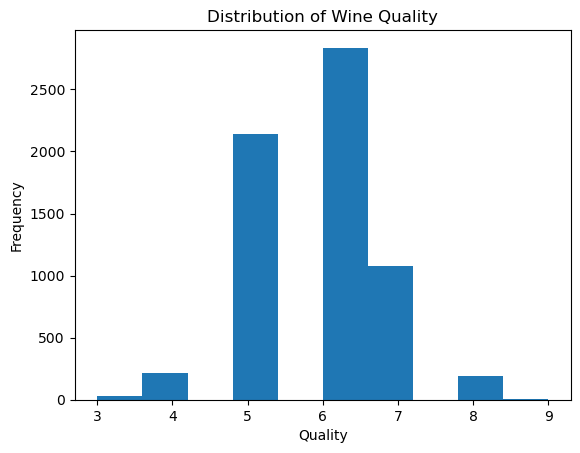

In [14]:
# Create a histogram of the "quality" column
plt.hist(wine['quality'])

# Set the title and axis labels
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#This code will create a histogram showing the distribution of wine quality ratings in the dataset

In [15]:
#We can notice that the classes are ordered and not balanced
#(e.g. there are much more normal wines than excellent or poor ones)

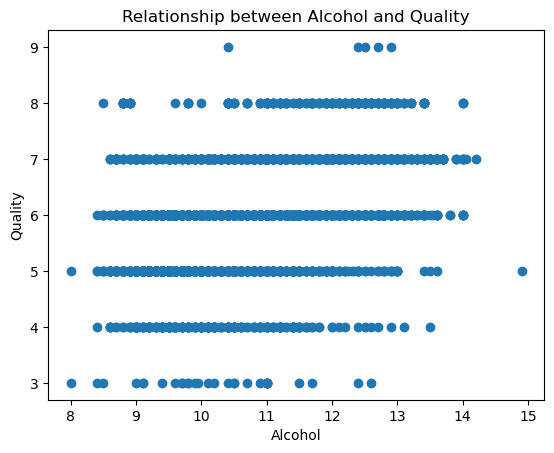

In [16]:
# Create a scatter plot to visualize the relationship between two variables, such as alcohol and quality
plt.scatter(wine['alcohol'], wine['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Relationship between Alcohol and Quality')
plt.show()

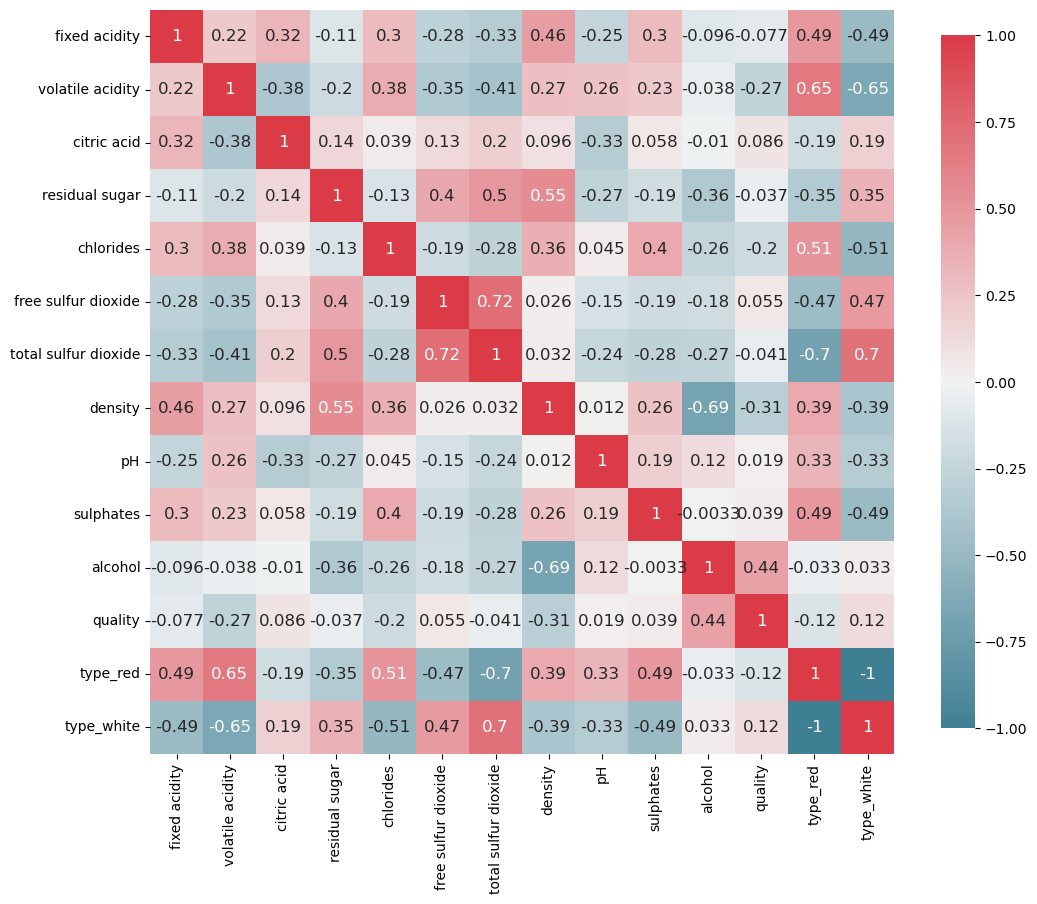

In [17]:
def plot_correlation_map(df1):
    corr = df1.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(wine)
plt.show()

In [18]:
#In this correlation map, darker colors represent higher correlations between variables,
#while lighter colors represent lower correlations. 
#We can see that alcohol has the highest positive correlation with quality, 
#indicating that wines with higher alcohol content tend to have better quality ratings.
#type of wine (red or white) seems to have a correlation (positive or negative depending on the type)
#Citric acid, free sulfur dioxide, and sulphates also have positive correlations with quality, but to a lesser degree. 
#pH has a very weak positive correlation with quality.
#Degree of positive correlation with quality are : alcohol (0.44),  type_white (0.12), citric acid(0.086)
# free sulfur dioxide (0.055), sulphates (0.039), pH(0.019)
#Considering negative significative correlation, we can order them as follows :
#density (-0.31),volatiles acidity (-0.27), chlorides (-0.2), type_red(-0.12)
#So according to this, we can consider the following attributes : alcohol (0.44),  type_white (0.12), density (-0.31),
#volatiles acidity (-0.27), chlorides (-0.2), type_red(-0.12), the other attributes are near to zero 

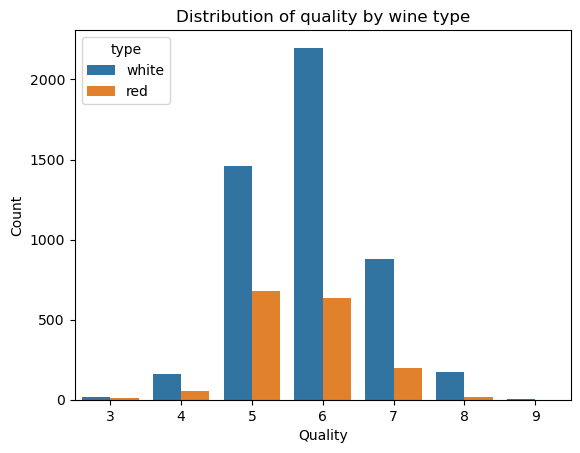

In [19]:
sns.countplot(x='quality', hue='type', data=df)
plt.title('Distribution of quality by wine type')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [20]:
#The code generates a count plot showing the distribution of wine quality by wine type. 
#The x-axis represents the different levels of wine quality (ranging from 3 to 9) and the y-axis represents 
#the count of each quality level. The plot also distinguishes between the two types of wine (red and white) 
#by using different colors for each type.
#The plot shows that the most common wine quality level is 6. 
#It also shows that there are more white wines than red wines in the dataset. 

<AxesSubplot:xlabel='type', ylabel='alcohol'>

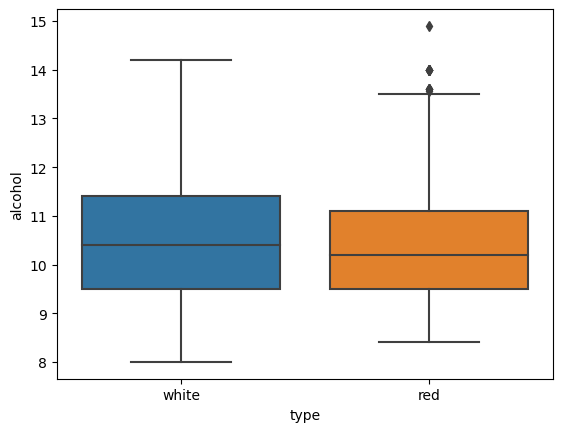

In [21]:
sns.boxplot(x='type', y='alcohol', data=df)


In [22]:
#The code creates a boxplot that shows the distribution of alcohol content for each wine type (red and white). 
#The x-axis represents the wine type and the y-axis represents the alcohol content.
#From the plot, we can see that the median alcohol content is lower for red wine compared to white wine. 
#Additionally, the distribution of alcohol content for white wine appears to be slightly wider than that for red wine,
#indicating that there is more variation in alcohol content for white wine.

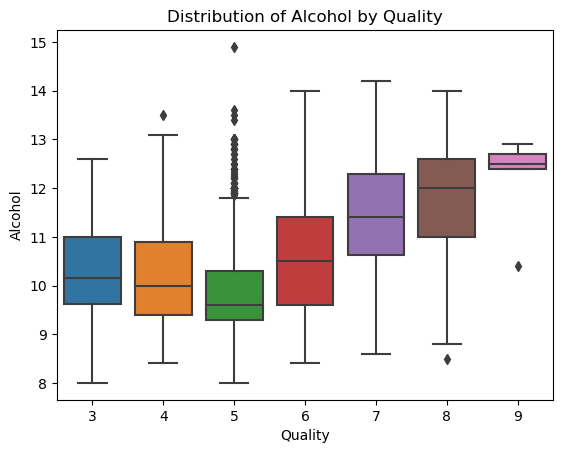

In [23]:
# Create a box plot to visualize the distribution of a variable, 
#such as alcohol, pH .... across different quality levels of wine 
sns.boxplot(x='quality', y='alcohol', data=wine)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Distribution of Alcohol by Quality')
plt.show()

In [24]:
#The code creates a box plot that shows the distribution of alcohol content for each quality rating in the wine dataset.
#The x-axis represents the quality rating, which is a categorical variable with values ranging from 3 to 9. 
#The y-axis represents the alcohol content, which is a continuous variable ranging from 8.0 to 14.9.
#The boxes in the plot represent the interquartile range of the alcohol content for each quality rating. 
#The horizontal line inside the box represents the median value of the alcohol content for that quality rating. 
#The whiskers extending from the box represent the range of the data, excluding any outliers, 
#which are shown as individual points beyond the whiskers.
#This plot allows us to compare the distribution of alcohol content for each quality rating and see 
#if there are any significant differences. For example, we can see that the median alcohol content tends to increase 
#as the quality rating increases. 


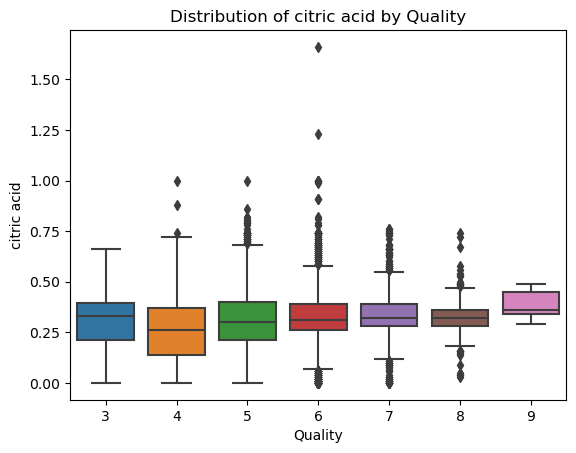

In [25]:
#We are going to do the same work by changing the considered feature
sns.boxplot(x='quality', y='citric acid', data=wine)
plt.xlabel('Quality')
plt.ylabel('citric acid')
plt.title('Distribution of citric acid by Quality')
plt.show()


In [26]:
#This code produces a boxplot which shows the distribution of citric acid levels for each quality category of wine.
#The x-axis shows the quality levels (3 to 9), and the y-axis shows the levels of citric acid. 
#Each box represents the distribution of citric acid levels for a particular quality category. 
#The bottom of the box represents the 25th percentile, the middle line represents the median, 
#and the top of the box represents the 75th percentile.
#From the plot, we can observe that the median citric acid levels tend to be slightly higher 
#for wines with higher quality ratings (6, 7, 8) compared to lower quality wines (3, 4, 5). 
#However, the difference is not very significant, and there is a considerable overlap in the distribution of citric acid 
#levels between different quality categories. 
#Therefore, we cannot conclude that citric acid level is a strong predictor of wine quality.

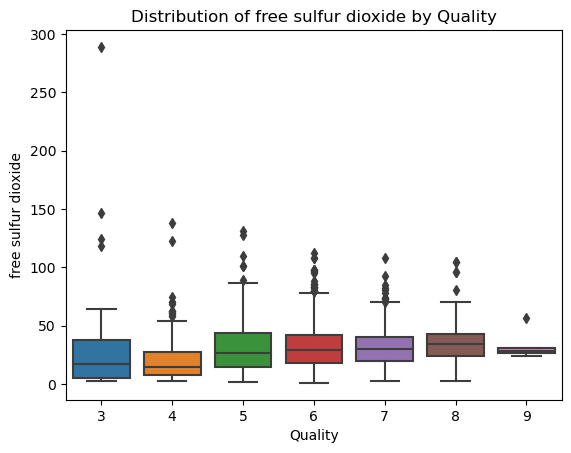

In [27]:
sns.boxplot(x='quality', y='free sulfur dioxide', data=wine)
plt.xlabel('Quality')
plt.ylabel('free sulfur dioxide')
plt.title('Distribution of free sulfur dioxide by Quality')
plt.show()

In [28]:
#This code generates a boxplot which shows the distribution of free sulfur dioxide in the different quality levels of wine. 
#The x-axis represents the quality levels and the y-axis represents the values of free sulfur dioxide.
#The boxes in the plot show the interquartile range, which represents the middle 50% of the data. 
#The horizontal line inside the box represents the median value. 

#From the plot, we can see that the median value of free sulfur dioxide tends to be higher for medium quality wines.
#There are also some outliers in the lower quality wines, indicating that some wines in this category 
#have unusually high levels of free sulfur dioxide. 


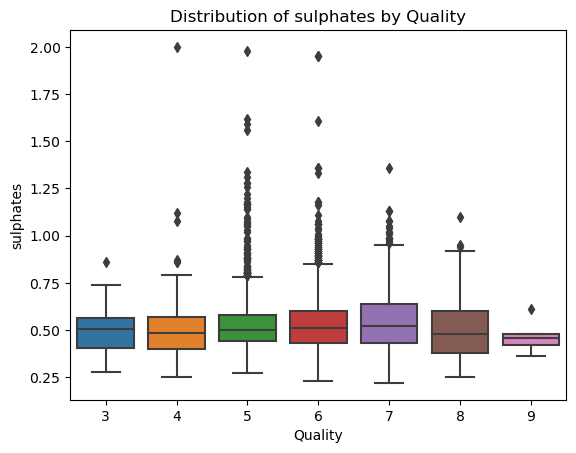

In [29]:
sns.boxplot(x='quality', y='sulphates', data=wine)
plt.xlabel('Quality')
plt.ylabel('sulphates')
plt.title('Distribution of sulphates by Quality')
plt.show()

In [30]:
#The boxplot shows the distribution of the 'sulphates' variable for each value of the 'quality' variable. 
#From the plot, we can see that there is some overlap in the distribution of 'sulphates' between different quality levels,
#but the median value generally increases as the quality level increases. 
#However, we should also note that there are some outliers in the medium and higher quality levels, 
#which may indicate some variability in the relationship between these variables.

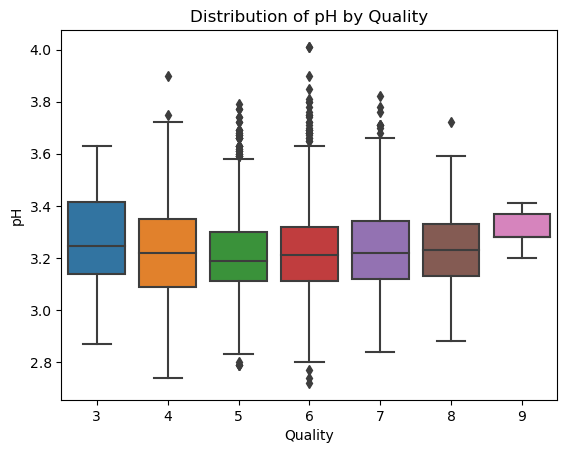

In [31]:
sns.boxplot(x='quality', y='pH', data=wine)
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Distribution of pH by Quality')
plt.show()

In [32]:
#The code generates a box plot that shows the distribution of pH values for different quality levels of wine.
#The box represents the interquartile range (IQR) of the pH values for each quality level.
#The horizontal line inside the box represents the median pH value, while the dots above and below the box represent outliers.
#We can see that the median pH values for different wine quality levels are relatively similar, 
#with only a slight difference between the lowest and highest quality levels. 
#Overall, we can conclude that pH may not be a strong predictor of wine quality based on this visualization.

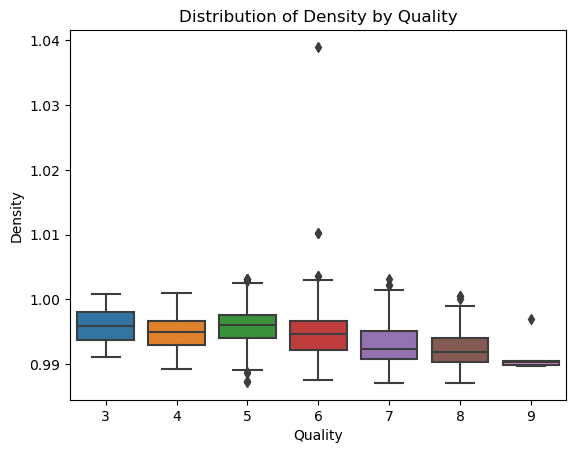

In [33]:
sns.boxplot(x='quality', y='density', data=wine)
plt.xlabel('Quality')
plt.ylabel('Density')
plt.title('Distribution of Density by Quality')
plt.show()

In [34]:
#The boxplot in the code represents the distribution of density of the wine samples across different quality levels. 
#The x-axis represents the quality levels ranging from 3 to 9. The y-axis represents the density of the wine samples.
#From the plot, it can be observed that the density of the wine samples decreases with increasing quality levels. 
#The median value of the density also decreases from lower to higher quality levels. 

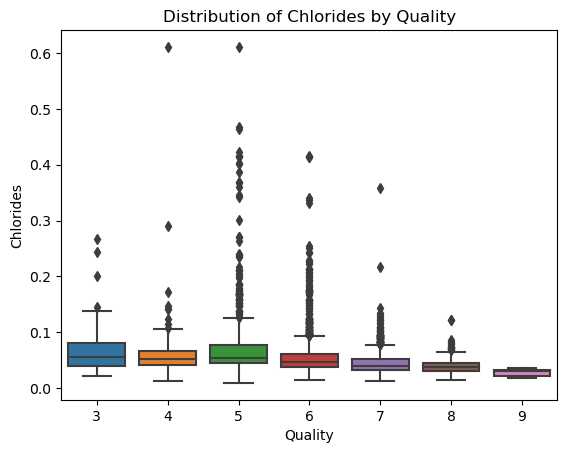

In [35]:
sns.boxplot(x='quality', y='chlorides', data=wine)
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.title('Distribution of Chlorides by Quality')
plt.show()

In [36]:
#The code is creating a box plot that displays the distribution of the "chlorides" variable across different wine qualities. 
#The x-axis represents the quality level while the y-axis represents the chlorides values.
#The plot shows that the median value of chlorides is higher in lower-quality wines, 
#and the distribution of chlorides is wider for lower-quality wines, with some outliers having very high values of chlorides. 
#This could indicate that chlorides play a role in determining the quality of wine, 
#and that lower levels of chlorides are generally associated with higher-quality wines.

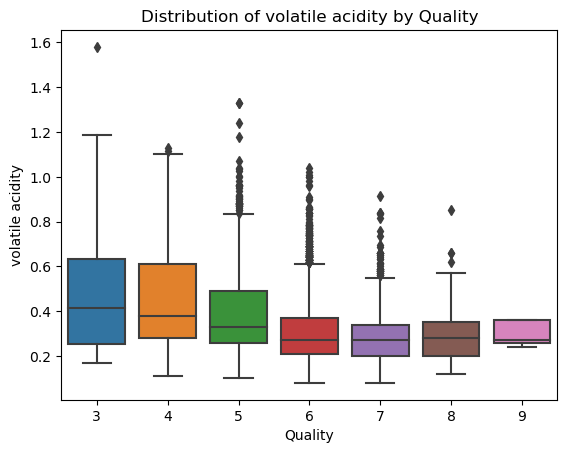

In [37]:
sns.boxplot(x='quality', y='volatile acidity', data=wine)
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.title('Distribution of volatile acidity by Quality')
plt.show()

In [38]:
#The plot shows that the median of volatile acidity decreases as the quality level of the wine increases, 
#indicating that higher quality wines tend to have lower levels of volatile acidity. 
#The range of volatile acidity also decreases as the quality level increases, with fewer outliers at higher quality levels. 
#Overall, the plot suggests that volatile acidity may be a significant factor in determining the quality of wine.

In [39]:
X = wine[['alcohol', 'density', 'volatile acidity','chlorides', 'type_red', 'type_white']]
y = wine['quality']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model performance using mean squared error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Mean Squared Error: 0.48862313082058745


In [40]:
#The Mean Squared Error (MSE) obtained in this case is 0.4886. MSE is a measure of how well the model is able to predict
#the target variable (quality) based on the given features. Lower values of MSE indicate that the model is better 
#at predicting the target variable. 
#Overall, the MSE obtained here can be used to compare the performance of different models and to evaluate whether 
#the model needs further refinement.

In [41]:
X1 = wine[['alcohol', 'density', 'volatile acidity','chlorides']]
y1= wine['quality']


# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred1 = lr.predict(X_test1)

# Evaluate the model performance using mean squared error

mse1 = mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error:", mse1)



Mean Squared Error: 0.4895422056828878


In [42]:
#In what follows, we will see the influence of removing certain attributes that are less significant 
#in terms of correlation according to the correlation matrix.
#For this example we remove the type (white and red) and we notice that there is practically no change in the result

In [43]:
X2 = wine[['alcohol', 'density', 'volatile acidity']]
y2= wine['quality']


# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train2, y_train2)

# Make predictions on the testing data
y_pred2 = lr.predict(X_test2)

# Evaluate the model performance using mean squared error

mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)

Mean Squared Error: 0.4896150783078668


In [44]:
#we notice that there is practically no change in the result

In [45]:
X3 = wine[['alcohol', 'density']]
y3= wine['quality']


# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train3, y_train3)

# Make predictions on the testing data
y_pred3 = lr.predict(X_test3)

# Evaluate the model performance using mean squared error
#from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_test3, y_pred3)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.5461580596315038


In [46]:
X4 = wine[['alcohol']]
y4= wine['quality']


# Split the dataset into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train4, y_train4)

# Make predictions on the testing data
y_pred4 = lr.predict(X_test4)

# Evaluate the model performance using mean squared error
#from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(y_test4, y_pred4)
print("Mean Squared Error:", mse4)

Mean Squared Error: 0.5454349661075119


In [47]:
#the MSE hasn't a significative value for the training
#Let's try polynomial regression

In [48]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.32708959730941223


In [49]:
#The R-squared score measures the proportion of the variance in the dependent variable (y) that is predictable 
#from the independent variables (X) in the model. It takes values between 0 and 1, with higher values indicating 
#better model fit.
#An R-squared score of 0.327 means that the polynomial regression model explains 32.7% of the variance in the wine quality data,
#which is not very high. 
#This indicates that the model may not be capturing all the relevant features that influence wine quality.

In [50]:
# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.3338866493519246


In [51]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly2 = poly.fit_transform(X_train2)
X_test_poly2 = poly.transform(X_test2)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly2, y_train2)

# Predict on the test set
y_pred2 = model.predict(X_test_poly2)

# Evaluate the model performance
r2 = r2_score(y_test2, y_pred2)
print("R-squared score:", r2)

R-squared score: 0.318291486022917


In [52]:
#We notice that the results are almost the same when we have tested different degrees and changed the selected feautures
#We have to explore other kind of methods
#Let's begin with KNN

In [53]:
# instantiate the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# calculate the accuracy of the model
accuracyKNN = accuracy_score(y_test, y_pred)
print('Accuracy KNN: {:.2%}'.format(accuracyKNN))


Accuracy KNN: 54.77%


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
#We are going to test different values of k and choose the best value

In [55]:
n_neighbors = 100
scores = []
best_k = 0
best_score = 0

for k in range(1, n_neighbors,4):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    scores.append(score)
    print('Accuracy KNN for k =', k, 'is:', round(score, 2))
    
    # Update best k and best score
    if score > best_score:
        best_k = k
        best_score = score

print('Best k:', best_k, 'with accuracy score:', round(best_score, 2))


Accuracy KNN for k = 1 is: 0.6
Accuracy KNN for k = 5 is: 0.55
Accuracy KNN for k = 9 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 13 is: 0.55
Accuracy KNN for k = 17 is: 0.56


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN for k = 21 is: 0.56
Accuracy KNN for k = 25 is: 0.57
Accuracy KNN for k = 29 is: 0.55
Accuracy KNN for k = 33 is: 0.56


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 37 is: 0.56
Accuracy KNN for k = 41 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 45 is: 0.55
Accuracy KNN for k = 49 is: 0.55
Accuracy KNN for k = 53 is: 0.55
Accuracy KNN for k = 57 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 61 is: 0.55
Accuracy KNN for k = 65 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN for k = 69 is: 0.55
Accuracy KNN for k = 73 is: 0.54
Accuracy KNN for k = 77 is: 0.54


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 81 is: 0.55
Accuracy KNN for k = 85 is: 0.55
Accuracy KNN for k = 89 is: 0.55
Accuracy KNN for k = 93 is: 0.55
Accuracy KNN for k = 97 is: 0.55
Best k: 1 with accuracy score: 0.6


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [56]:
#We repeat the same work for X1 = wine[['alcohol', 'density', 'volatile acidity','chlorides']]

n_neighbors = 100
scores = []
best_k = 0
best_score = 0

for k in range(1, n_neighbors,4):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    y_pred1 = knn.predict(X_test1)
    score = accuracy_score(y_pred1, y_test1)
    scores.append(score)
    print('Accuracy KNN for k =', k, 'is:', round(score, 2))
    
    # Update best k and best score
    if score > best_score:
        best_k = k
        best_score = score

print('Best k:', best_k, 'with accuracy score:', round(best_score, 2))


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 1 is: 0.59
Accuracy KNN for k = 5 is: 0.55
Accuracy KNN for k = 9 is: 0.55
Accuracy KNN for k = 13 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 17 is: 0.55
Accuracy KNN for k = 21 is: 0.55
Accuracy KNN for k = 25 is: 0.56
Accuracy KNN for k = 29 is: 0.55
Accuracy KNN for k = 33 is: 0.55
Accuracy KNN for k = 37 is: 0.56


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 41 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 45 is: 0.55
Accuracy KNN for k = 49 is: 0.55
Accuracy KNN for k = 53 is: 0.55
Accuracy KNN for k = 57 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN for k = 61 is: 0.54
Accuracy KNN for k = 65 is: 0.54
Accuracy KNN for k = 69 is: 0.54


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 73 is: 0.54
Accuracy KNN for k = 77 is: 0.53
Accuracy KNN for k = 81 is: 0.54


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN for k = 85 is: 0.54
Accuracy KNN for k = 89 is: 0.55
Accuracy KNN for k = 93 is: 0.55
Accuracy KNN for k = 97 is: 0.55
Best k: 1 with accuracy score: 0.59


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [57]:
#We repeat the same work for X2 = wine[['alcohol', 'density', 'volatile acidity']]

n_neighbors = 100
scores = []
best_k = 0
best_score = 0

for k in range(1, n_neighbors,4):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2)
    y_pred2 = knn.predict(X_test2)
    score = accuracy_score(y_pred2, y_test2)
    scores.append(score)
    print('Accuracy KNN for k =', k, 'is:', round(score, 2))
    
    # Update best k and best score
    if score > best_score:
        best_k = k
        best_score = score

print('Best k:', best_k, 'with accuracy score:', round(best_score, 2))


Accuracy KNN for k = 1 is: 0.58


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 5 is: 0.53
Accuracy KNN for k = 9 is: 0.54
Accuracy KNN for k = 13 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 17 is: 0.54
Accuracy KNN for k = 21 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN for k = 25 is: 0.57
Accuracy KNN for k = 29 is: 0.56
Accuracy KNN for k = 33 is: 0.55


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 37 is: 0.55
Accuracy KNN for k = 41 is: 0.54


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN for k = 45 is: 0.55
Accuracy KNN for k = 49 is: 0.56


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 53 is: 0.55
Accuracy KNN for k = 57 is: 0.55
Accuracy KNN for k = 61 is: 0.55
Accuracy KNN for k = 65 is: 0.55
Accuracy KNN for k = 69 is: 0.55
Accuracy KNN for k = 73 is: 0.54


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 77 is: 0.54
Accuracy KNN for k = 81 is: 0.54
Accuracy KNN for k = 85 is: 0.54


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 89 is: 0.54
Accuracy KNN for k = 93 is: 0.55
Accuracy KNN for k = 97 is: 0.54
Best k: 1 with accuracy score: 0.58


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [58]:
#We repeat the same work for X3 = wine[['alcohol', 'density']]

n_neighbors = 100
scores = []
best_k = 0
best_score = 0

for k in range(1, n_neighbors,4):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train3, y_train3)
    y_pred3 = knn.predict(X_test3)
    score = accuracy_score(y_pred3, y_test3)
    scores.append(score)
    print('Accuracy KNN for k =', k, 'is:', round(score, 2))
    
    # Update best k and best score
    if score > best_score:
        best_k = k
        best_score = score

print('Best k:', best_k, 'with accuracy score:', round(best_score, 2))


Accuracy KNN for k = 1 is: 0.56
Accuracy KNN for k = 5 is: 0.52


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 9 is: 0.5
Accuracy KNN for k = 13 is: 0.52
Accuracy KNN for k = 17 is: 0.54


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 21 is: 0.53


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 25 is: 0.52
Accuracy KNN for k = 29 is: 0.53


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN for k = 33 is: 0.53
Accuracy KNN for k = 37 is: 0.52
Accuracy KNN for k = 41 is: 0.52


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 45 is: 0.52
Accuracy KNN for k = 49 is: 0.52
Accuracy KNN for k = 53 is: 0.52
Accuracy KNN for k = 57 is: 0.53
Accuracy KNN for k = 61 is: 0.52


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 65 is: 0.52
Accuracy KNN for k = 69 is: 0.53
Accuracy KNN for k = 73 is: 0.53
Accuracy KNN for k = 77 is: 0.53


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy KNN for k = 81 is: 0.53
Accuracy KNN for k = 85 is: 0.53
Accuracy KNN for k = 89 is: 0.53
Accuracy KNN for k = 93 is: 0.53
Accuracy KNN for k = 97 is: 0.52
Best k: 1 with accuracy score: 0.56


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [59]:
#Changing the selected features and changing the value of k don't have an important impact on the accuracy 
#which is between 0.5 and 0.6 and the best k is always 1
#So we decide to test another algorithm

In [60]:
# We test the Decision tree classifier, we are going to change the chosen features and compare the accuracy

In [61]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 2), "%")


Accuracy: 57.62 %


In [62]:
#Decision Tree for X1 = wine[['alcohol', 'density', 'volatile acidity','chlorides']]


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train1, y_train1)

# Predict the labels of the test data
y_pred1 = dt_classifier.predict(X_test1)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy:", round(accuracy*100, 2), "%")

Accuracy: 58.31 %


In [63]:
#Decision Tree for X2 = wine[['alcohol', 'density', 'volatile acidity']]

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train2, y_train2)

# Predict the labels of the test data
y_pred2 = dt_classifier.predict(X_test2)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", round(accuracy*100, 2), "%")

Accuracy: 59.62 %


In [64]:
#Decision tree for X3 = wine[['alcohol', 'density']]

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train3, y_train3)

# Predict the labels of the test data
y_pred3 = dt_classifier.predict(X_test3)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test3, y_pred3)
print("Accuracy:", round(accuracy*100, 2), "%")

Accuracy: 53.46 %


In [65]:
#The accuracy for the different chosen features didn't reach 60% 
#We think we should fine tune the Decision Tree Classifier by using as a first step the gini impurity

In [66]:
dt_classifier = DecisionTreeClassifier(random_state=42,criterion='gini')
dt_classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 2), "%")


Accuracy: 57.62 %


In [67]:
#Decision Tree using Gini impurity  for X1 = wine[['alcohol', 'density', 'volatile acidity','chlorides']]


dt_classifier = DecisionTreeClassifier(random_state=42,criterion='gini')
dt_classifier.fit(X_train1, y_train1)

# Predict the labels of the test data
y_pred1 = dt_classifier.predict(X_test1)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy:", round(accuracy*100, 2), "%")

Accuracy: 58.31 %


In [68]:
#Decision Tree using Gini impurity for X2 = wine[['alcohol', 'density', 'volatile acidity']]

dt_classifier = DecisionTreeClassifier(random_state=42,criterion='gini')
dt_classifier.fit(X_train2, y_train2)

# Predict the labels of the test data
y_pred2 = dt_classifier.predict(X_test2)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", round(accuracy*100, 2), "%")

Accuracy: 59.62 %


In [69]:
#Even here, the accuracy didn't reach 60% 
#We think we should fine tune the Decision Tree Classifier by changing the hyperparameters 

In [70]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42,criterion='gini')

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    }
#Here we create a dictionary param_grid containing the hyperparameters to search over using a grid search. 
#The hyperparameters include the maximum depth of the tree, the minimum number of samples required to split an internal node,
#the minimum number of samples required to be at a leaf node


# Initialize the grid search object
grid_search = GridSearchCV(dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
#Here we create an instance of GridSearchCV, which performs a cross-validation grid search over the hyperparameters specified 
#in param_grid to find the best hyperparameters for the decision tree model. 
#The parameter cv sets the number of cross-validation folds to 5, and n_jobs specifies the number of CPUs to use for parallel
#processing. The dt_classifier argument specifies the model to be tuned.

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)
#This fits the grid search object to the training data, where X_train are the input features and y_train are the target values.
#The grid search object performs a search over the hyperparameters defined in param_grid to find the best set 
#of hyperparameters that minimize the error on the training data.


# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", round(grid_search.best_score_*100, 2), "%")


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 54.97 %


In [71]:
#Same work will be done with changing the selected features
#Here we will consider X2
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42,criterion='gini')

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    }

# Initialize the grid search object
grid_search = GridSearchCV(dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(X_train2, y_train2)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", round(grid_search.best_score_*100, 2), "%")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 55.84 %


In [72]:
#As the accuracy didn't reach 60% We will try the Random Forest Classifier

In [73]:
#We are going to create a loop in order to test different Random Forest Classifiers
#Set initial values for the best accuracy and number of estimators
best_accuracy = 0
best_n_estimators = 0

#Iterate over a range of values for the number of estimators, from 10 to 250 (by 10 times)
for n in range(10, 250, 10):
    # Create a Random Forest Classifier with n_estimators=n 
    rfc = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Fit the classifier to the training data
    rfc.fit(X_train, y_train)
    
    # Use the trained classifier to make predictions on the test set
    y_pred = rfc.predict(X_test)
    
    # Compute the accuracy of the classifier on the test set
    accuracy = accuracy_score(y_test, y_pred)
    
    # If the current accuracy is better than the previous best accuracy, update the best accuracy and number of estimator
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n
        
    # Print the current number of estimators and the corresponding accuracy
    print("n_estimators = {}, accuracy = {:.2f}%".format(n, accuracy*100))

#Print the best number of estimators and corresponding accuracy
print("Best n_estimators: {}, Best accuracy: {:.2f}%".format(best_n_estimators, best_accuracy*100))



n_estimators = 10, accuracy = 63.85%
n_estimators = 20, accuracy = 64.08%
n_estimators = 30, accuracy = 65.00%
n_estimators = 40, accuracy = 64.77%
n_estimators = 50, accuracy = 65.62%
n_estimators = 60, accuracy = 65.38%
n_estimators = 70, accuracy = 65.38%
n_estimators = 80, accuracy = 65.85%
n_estimators = 90, accuracy = 64.92%
n_estimators = 100, accuracy = 65.31%
n_estimators = 110, accuracy = 65.00%
n_estimators = 120, accuracy = 65.00%
n_estimators = 130, accuracy = 65.38%
n_estimators = 140, accuracy = 65.23%
n_estimators = 150, accuracy = 65.00%
n_estimators = 160, accuracy = 64.85%
n_estimators = 170, accuracy = 65.08%
n_estimators = 180, accuracy = 64.77%
n_estimators = 190, accuracy = 65.00%
n_estimators = 200, accuracy = 65.08%
n_estimators = 210, accuracy = 65.23%
n_estimators = 220, accuracy = 64.92%
n_estimators = 230, accuracy = 64.85%
n_estimators = 240, accuracy = 64.77%
Best n_estimators: 80, Best accuracy: 65.85%


In [74]:
#Using Random Forest Classifier gives us better accuracy 65.85% for 80 estimators
#We are going to try the same code for different chosen features

In [75]:
#Let's try with X1
#Set initial values for the best accuracy and number of estimators
best_accuracy = 0
best_n_estimators = 0

#Iterate over a range of values for the number of estimators, from 10 to 250 (by 10 times)
for n in range(10, 250, 10):
    # Create a Random Forest Classifier with n_estimators=n 
    rfc = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Fit the classifier to the training data
    rfc.fit(X_train1, y_train1)
    
    # Use the trained classifier to make predictions on the test set
    y_pred1 = rfc.predict(X_test1)
    
    # Compute the accuracy of the classifier on the test set
    accuracy = accuracy_score(y_test1, y_pred1)
    
    # If the current accuracy is better than the previous best accuracy, update the best accuracy and number of estimator
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n
        
    # Print the current number of estimators and the corresponding accuracy
    print("n_estimators = {}, accuracy = {:.2f}%".format(n, accuracy*100))

#Print the best number of estimators and corresponding accuracy
print("Best n_estimators: {}, Best accuracy: {:.2f}%".format(best_n_estimators, best_accuracy*100))


n_estimators = 10, accuracy = 63.23%
n_estimators = 20, accuracy = 62.77%
n_estimators = 30, accuracy = 63.77%
n_estimators = 40, accuracy = 64.38%
n_estimators = 50, accuracy = 63.92%
n_estimators = 60, accuracy = 64.69%
n_estimators = 70, accuracy = 64.54%
n_estimators = 80, accuracy = 64.54%
n_estimators = 90, accuracy = 64.38%
n_estimators = 100, accuracy = 64.08%
n_estimators = 110, accuracy = 64.15%
n_estimators = 120, accuracy = 64.31%
n_estimators = 130, accuracy = 64.15%
n_estimators = 140, accuracy = 64.00%
n_estimators = 150, accuracy = 63.69%
n_estimators = 160, accuracy = 63.69%
n_estimators = 170, accuracy = 63.85%
n_estimators = 180, accuracy = 63.46%
n_estimators = 190, accuracy = 64.08%
n_estimators = 200, accuracy = 64.62%
n_estimators = 210, accuracy = 64.15%
n_estimators = 220, accuracy = 64.38%
n_estimators = 230, accuracy = 64.46%
n_estimators = 240, accuracy = 64.38%
Best n_estimators: 60, Best accuracy: 64.69%


In [76]:
#We try now with X2
#Set initial values for the best accuracy and number of estimators
best_accuracy = 0
best_n_estimators = 0

#Iterate over a range of values for the number of estimators, from 10 to 250 (by 10 times)
for n in range(10, 250, 10):
    # Create a Random Forest Classifier with n_estimators=n 
    rfc = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Fit the classifier to the training data
    rfc.fit(X_train2, y_train2)
    
    # Use the trained classifier to make predictions on the test set
    y_pred2 = rfc.predict(X_test2)
    
    # Compute the accuracy of the classifier on the test set
    accuracy = accuracy_score(y_test2, y_pred2)
    
    # If the current accuracy is better than the previous best accuracy, update the best accuracy and number of estimator
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n
        
    # Print the current number of estimators and the corresponding accuracy
    print("n_estimators = {}, accuracy = {:.2f}%".format(n, accuracy*100))

#Print the best number of estimators and corresponding accuracy
print("Best n_estimators: {}, Best accuracy: {:.2f}%".format(best_n_estimators, best_accuracy*100))

n_estimators = 10, accuracy = 62.38%
n_estimators = 20, accuracy = 63.00%
n_estimators = 30, accuracy = 63.08%
n_estimators = 40, accuracy = 63.46%
n_estimators = 50, accuracy = 63.38%
n_estimators = 60, accuracy = 63.69%
n_estimators = 70, accuracy = 63.54%
n_estimators = 80, accuracy = 63.54%
n_estimators = 90, accuracy = 63.54%
n_estimators = 100, accuracy = 63.77%
n_estimators = 110, accuracy = 63.46%
n_estimators = 120, accuracy = 63.38%
n_estimators = 130, accuracy = 63.23%
n_estimators = 140, accuracy = 63.23%
n_estimators = 150, accuracy = 63.31%
n_estimators = 160, accuracy = 63.08%
n_estimators = 170, accuracy = 63.08%
n_estimators = 180, accuracy = 63.15%
n_estimators = 190, accuracy = 63.38%
n_estimators = 200, accuracy = 63.54%
n_estimators = 210, accuracy = 63.38%
n_estimators = 220, accuracy = 63.08%
n_estimators = 230, accuracy = 63.08%
n_estimators = 240, accuracy = 63.00%
Best n_estimators: 100, Best accuracy: 63.77%


In [77]:
#We choose here X3
#Set initial values for the best accuracy and number of estimators
best_accuracy = 0
best_n_estimators = 0

#Iterate over a range of values for the number of estimators, from 10 to 250 (by 10 times)
for n in range(10, 250, 10):
    # Create a Random Forest Classifier with n_estimators=n 
    rfc = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Fit the classifier to the training data
    rfc.fit(X_train3, y_train3)
    
    # Use the trained classifier to make predictions on the test set
    y_pred3 = rfc.predict(X_test3)
    
    # Compute the accuracy of the classifier on the test set
    accuracy = accuracy_score(y_test3, y_pred3)
    
    # If the current accuracy is better than the previous best accuracy, update the best accuracy and number of estimator
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n
        
    # Print the current number of estimators and the corresponding accuracy
    print("n_estimators = {}, accuracy = {:.2f}%".format(n, accuracy*100))

#Print the best number of estimators and corresponding accuracy
print("Best n_estimators: {}, Best accuracy: {:.2f}%".format(best_n_estimators, best_accuracy*100))

n_estimators = 10, accuracy = 55.77%
n_estimators = 20, accuracy = 56.54%
n_estimators = 30, accuracy = 56.62%
n_estimators = 40, accuracy = 56.31%
n_estimators = 50, accuracy = 56.77%
n_estimators = 60, accuracy = 56.46%
n_estimators = 70, accuracy = 56.46%
n_estimators = 80, accuracy = 56.23%
n_estimators = 90, accuracy = 56.92%
n_estimators = 100, accuracy = 57.31%
n_estimators = 110, accuracy = 57.62%
n_estimators = 120, accuracy = 57.54%
n_estimators = 130, accuracy = 57.77%
n_estimators = 140, accuracy = 57.77%
n_estimators = 150, accuracy = 57.77%
n_estimators = 160, accuracy = 57.46%
n_estimators = 170, accuracy = 57.54%
n_estimators = 180, accuracy = 57.46%
n_estimators = 190, accuracy = 57.54%
n_estimators = 200, accuracy = 57.15%
n_estimators = 210, accuracy = 56.69%
n_estimators = 220, accuracy = 57.08%
n_estimators = 230, accuracy = 57.00%
n_estimators = 240, accuracy = 56.92%
Best n_estimators: 130, Best accuracy: 57.77%


In [78]:
# As a conculsion, if we compare the explored classifiers and parameters we can notice that the Random Forest Classifier 
#gives us better accuracy 65.85% for 80 estimators for the set of the selected features 
#X = wine[['alcohol', 'density', 'volatile acidity','chlorides', 'type_red', 'type_white']]
#y = wine['quality']
#As we know, Random Forest is better than decision tree in terms of accuracy and can also prevent overfitting